In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cp /content/drive/MyDrive/CSVs/* ./

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [9]:
from pandas_datareader import data as pdr
from datetime import datetime

In [86]:
df = pd.read_csv('/content/IBM_stock.csv')

In [87]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,114.349998,112.419998,113.330002,113.669998,4982800.0,99.434967
1,2019-01-02,115.980003,111.690002,112.010002,115.209999,4239900.0,100.782135
2,2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0,98.770157
3,2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0,102.627876
4,2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0,103.353943


In [88]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,135.619995,134.610001,135.610001,134.979996,1202100.0,123.739563
249,2019-12-26,135.309998,134.649994,134.979996,134.910004,2129700.0,123.675400
250,2019-12-27,135.750000,134.869995,135.000000,135.270004,2752200.0,124.005402
251,2019-12-30,135.300003,132.500000,135.199997,132.809998,4118900.0,121.750267
252,2019-12-31,134.119995,132.399994,132.529999,134.039993,3777500.0,122.877831


In [89]:
close = df['Close']
print(close)

0      113.669998
1      115.209999
2      112.910004
3      117.320000
4      118.150002
          ...    
248    134.979996
249    134.910004
250    135.270004
251    132.809998
252    134.039993
Name: Close, Length: 253, dtype: float64


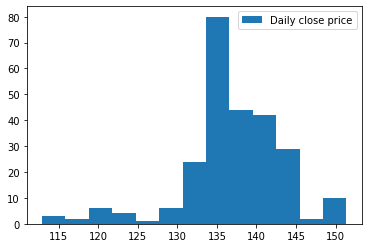

In [90]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

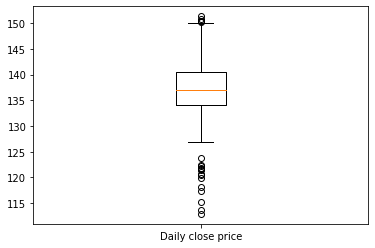

In [91]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

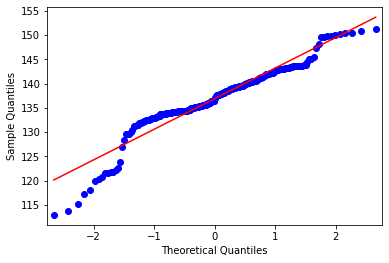

In [92]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [93]:
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))

Mean is:  136.89640410050103
Standard deviation is:  6.316575105462319
Median is:  136.97999572753906


In [94]:
print("Skewness of the distribution is: ", stats.skew(close))

Skewness of the distribution is:  -0.8664146193034279


In [95]:
print("Skewtest of the distribution is: ", stats.skewtest(close))

Skewtest of the distribution is:  SkewtestResult(statistic=-5.079821629655024, pvalue=3.777894129602461e-07)


In [96]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))

Kurtosis of the distributionn is:  2.3067162418671314


In [97]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=4.204547944810507, pvalue=2.6160448268089633e-05)


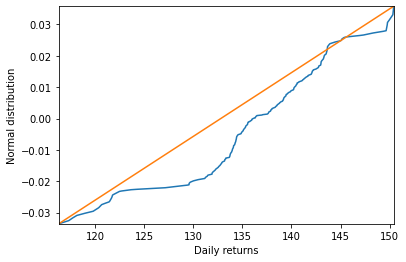

In [98]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

## Daily Return

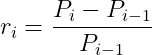

In [99]:
## Daily Return
returns = close.pct_change(1).dropna()
print(returns)

1      0.013548
2     -0.019964
3      0.039058
4      0.007075
5      0.014219
         ...   
248   -0.004205
249   -0.000519
250    0.002668
251   -0.018186
252    0.009261
Name: Close, Length: 252, dtype: float64


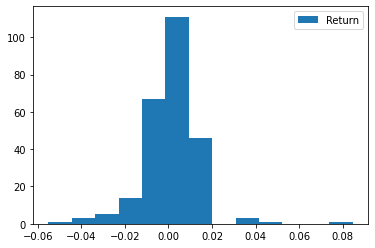

In [100]:
plt.hist(returns, bins="rice", label="Return")
plt.legend()
plt.show()

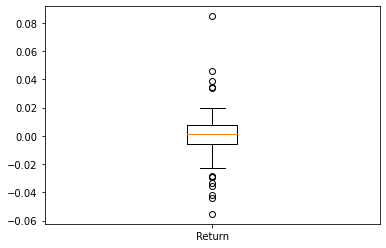

In [101]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

In [102]:
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))

Mean is:  0.0007386940263543147
Standard deviation is:  0.013014622424599644
Median is:  0.0013773907711658318


In [103]:
print("Skewness of the distribution is: ", stats.skew(returns))

Skewness of the distribution is:  0.47299691835322777


In [104]:
print("Skewtest of the distribution is: ", stats.skewtest(returns))

Skewtest of the distribution is:  SkewtestResult(statistic=3.008096313205963, pvalue=0.0026288980807749095)


In [105]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))

Kurtosis of the distributionn is:  8.67343605913892


In [106]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=7.204959430257858, pvalue=5.806113410867165e-13)


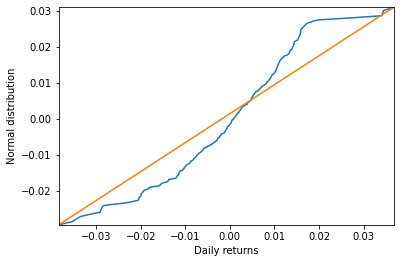

In [107]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

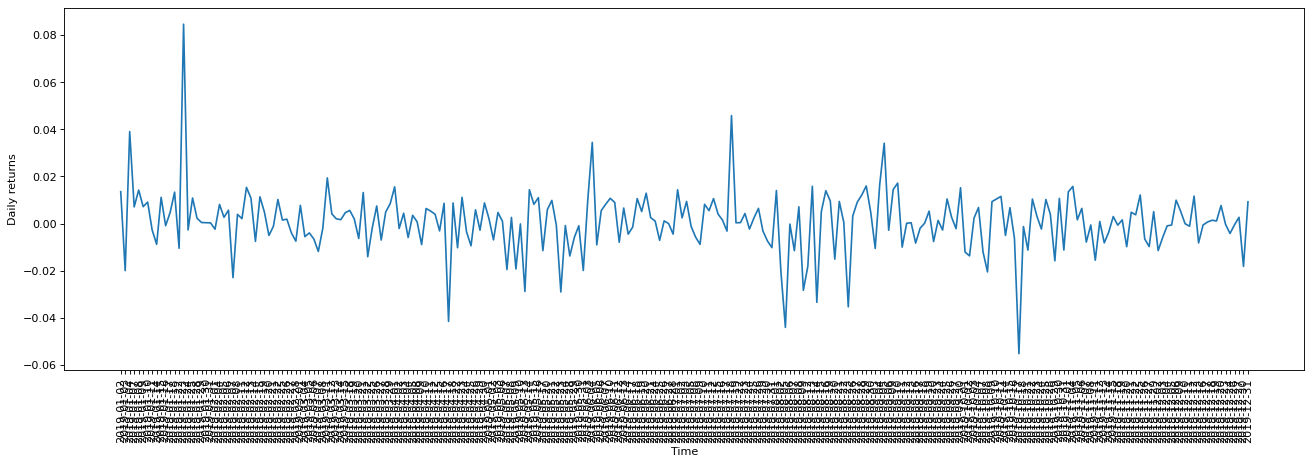

In [108]:
## Volatility of the distribution curve.
## Look at the original time series
plt.figure(figsize=(20, 6), dpi=80)
dates= df["Date"][1:]
data=[[i,j] for i,j in zip(dates,returns)]
plt.plot(dates,returns)
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

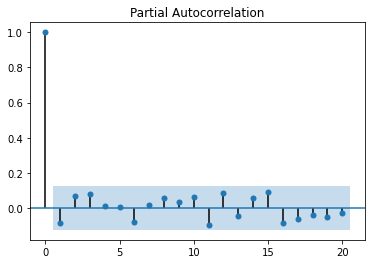

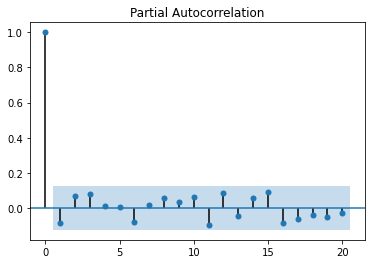

In [109]:
## Auto correlation function
plot_pacf(returns,lags=20)